<h1><center>PHYS 5306: Classical Dynamics</center></h1>

<h2><center>Joseph D. Romano<br>
    Texas Tech University<br>
    (Fall 2020)
    </center></h2>

<center><a href = "mailto: joseph.d.romano@ttu.edu">joseph.d.romano@ttu.edu</a></center>

## Load relevant packages

In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pickle, json
import astropy.constants as c
import astropy.units as u
from mpmath import *
from sympy import *
import sympy
from sympy.solvers import solve
from sympy.plotting import plot

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True

# Lagrangian mechanics

1) Write down the Lagrangian for a simple system in terms of generalized coordinates.

Example

$$
L(q,\dot q, t) = \frac{1}{2}m\dot q^2 - \frac{1}{2}kq^2
$$

More generally:

$$
L= \frac{1}{2}\sum_{j,k}a_{jk}(q) \dot q_j\dot q_k - U(q_1,q_2,\cdots, q_n, t)
$$

2) Distinguish generalized coordinates from Cartesian coordinates.

Example: Double pendulum

<img src="img/double_pendulum.pdf" width="400">

Use the two angles $\phi_1$, $\phi_2$ for the generalized coordinates $q_1$, $q_2$, as opposed to the Cartesian coordinates $(x_1,y_1)$ and $(x_2,y_2)$ subject to constraints imposed by the pendulum rods.

3) Write down Lagrange's equations.

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial \dot q_i}\right)
= \frac{\partial L}{\partial q_i}\,,
\qquad i=1,2,\cdots, n
$$

This is of the form

$$
\frac{dp_i}{dt} = F_i
\qquad i=1,2,\cdots, n
$$

where $p_i\equiv \partial L/\partial \dot q_i$ and $F_i = -\partial U/\partial q_i$, for the case where $T$ does not depend explicitly on $q$.

4) Derive Lagrange's equations starting from the action $S$.


5) Define the action in terms of the Lagrangian, and the conditions for the variation of the action.

Action:

$$
S[q] = \int_{t_1}^{t_2} dt\> L(q,\dot q, t) 
$$

Lagrange's equations are obtained from $\delta S=0$ for variations $\delta q_i$ that vanish at the end points $t_1$ and $t_2$.

6) Show that Lagrange's equations are unchanged if one adds a total time derivative $d f(q,t)/d t$ to $L$.

Define

$$
\bar{L}(q,\dot q,t) \equiv L(q,\dot q, t) + \frac{df(q,t)}{dt}
$$

Then

$$
\bar{S}[q] \equiv \int_{t_1}^{t_2} dt\> \bar{L}(q,\dot q, t) 
= S[q] + f(q,t)\big|_{t_2} - f(q,t)\big|_{t_2}
$$

Since $\delta q|_{t_1}=0$ and $\delta q|_{t_2}=0$, it follows that $\delta \bar{S}=\delta S$.
So the EOMs from $L$ and $\bar{L}\equiv L + df(q,t)/dt$ are the same.

7) Include constraint forces in the Lagrangian formalism by introducing Lagrange multipliers and constraint functions.

8) Include non-conservative forces in the Lagrangian formalism by adding the generalized force 
$ F_i\equiv\sum_a \vec{F}_a\cdot \partial \vec r_a/\partial q_i $ 
to the RHS of Lagrange's equations.

9) Define and give examples of a *closed system*, *constant external field*, and *uniform field*.

**Closed system:** 

The potential $U$ is a function of only the relative position vectors $\vec r_1-\vec r_2$, etc. 

**Constant external field:** 

$$
U \equiv U(\vec r_1, \vec r_2, \cdots, \vec r_N)
$$ 

has no explicit time dependence

**Uniform field:**

$$
U = -\sum_a \vec F_a\cdot \vec r_a
$$

where $F$ is independent of $\vec r_1$, $\vec r_2$, etc., so that 

$$
-\frac{\partial U}{\partial\vec r_a}= \vec F_a
\quad{\rm has\ no\ position\ dependence}
$$



Text(0.5, 1.0, 'Newtonian gravity')

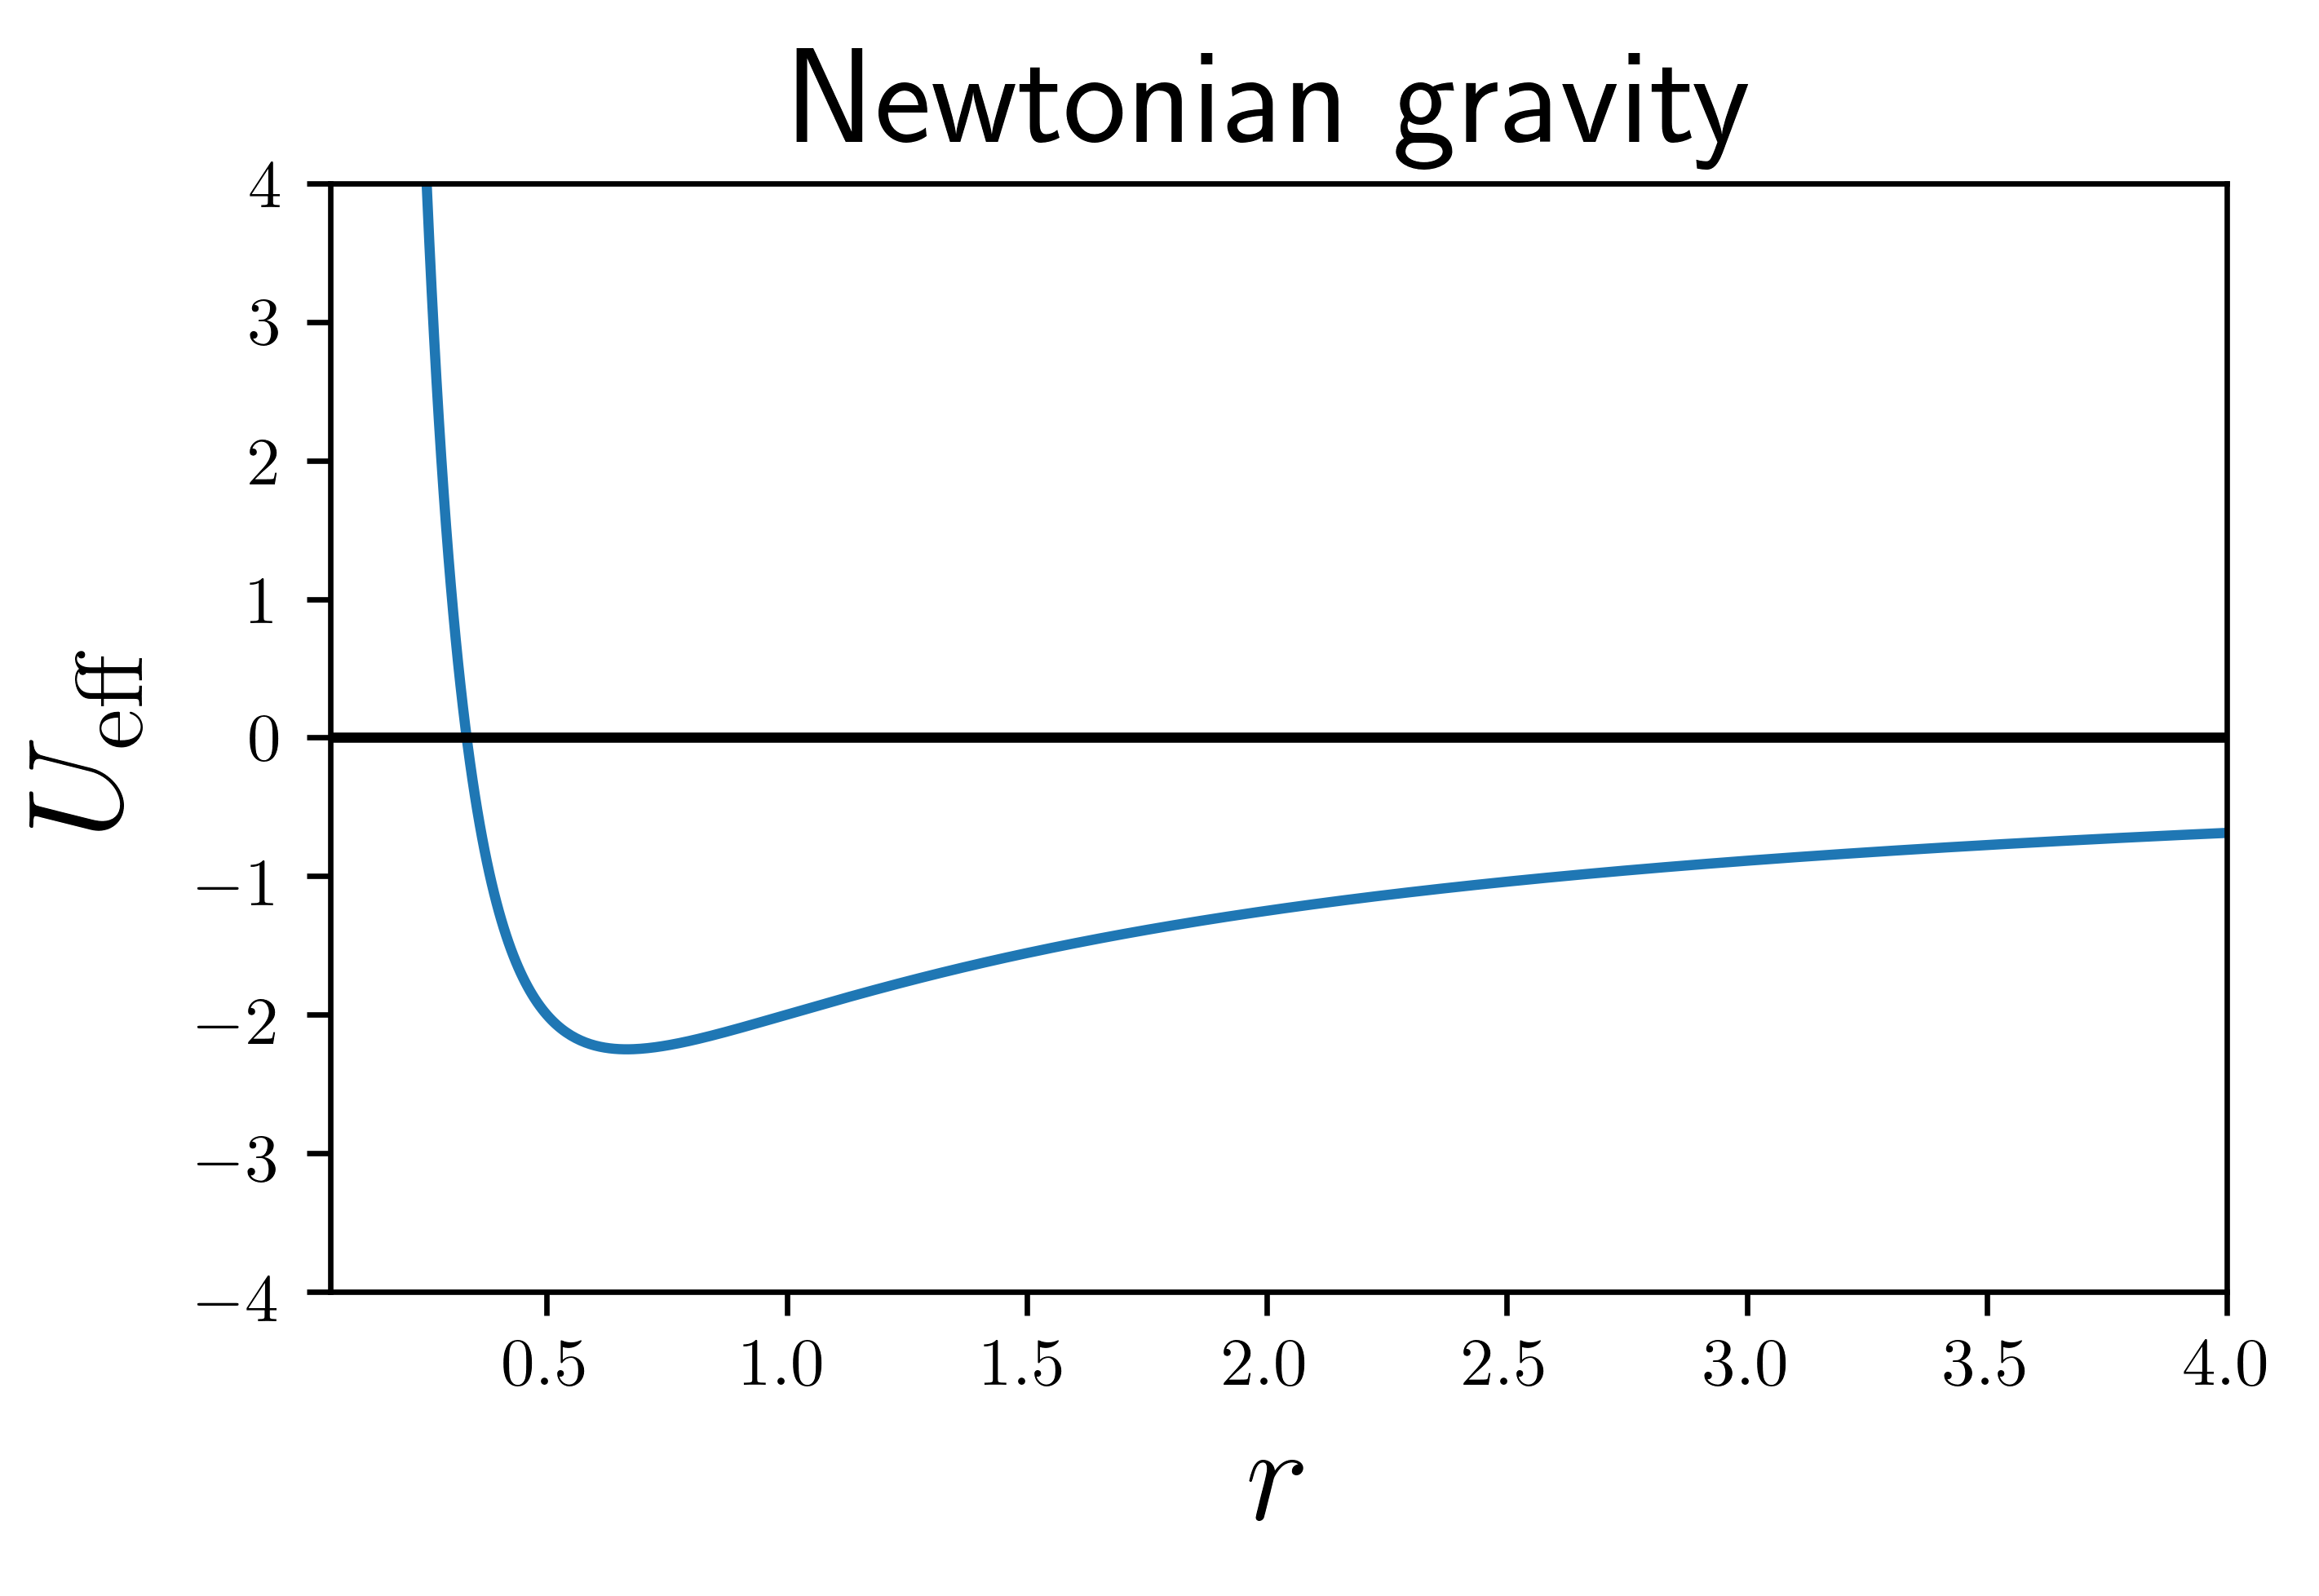

In [22]:
# kepler effective potential
eps = 1e-4
r = np.linspace(eps, 5, 1000)

U = -3./r
Ueff = U + 1./r**2

plt.figure()
plt.plot(r, Ueff)
plt.axhline(y=0, color='k')
plt.xlim((0.05, 4))
plt.ylim((-4,4))
plt.xlabel('$r$', fontsize='20')
plt.ylabel('$U_{\mathrm{eff}}$', fontsize='20')
plt.title('Newtonian gravity', fontsize='20')

Text(0.5, 1.0, '3d harmonic oscillator')

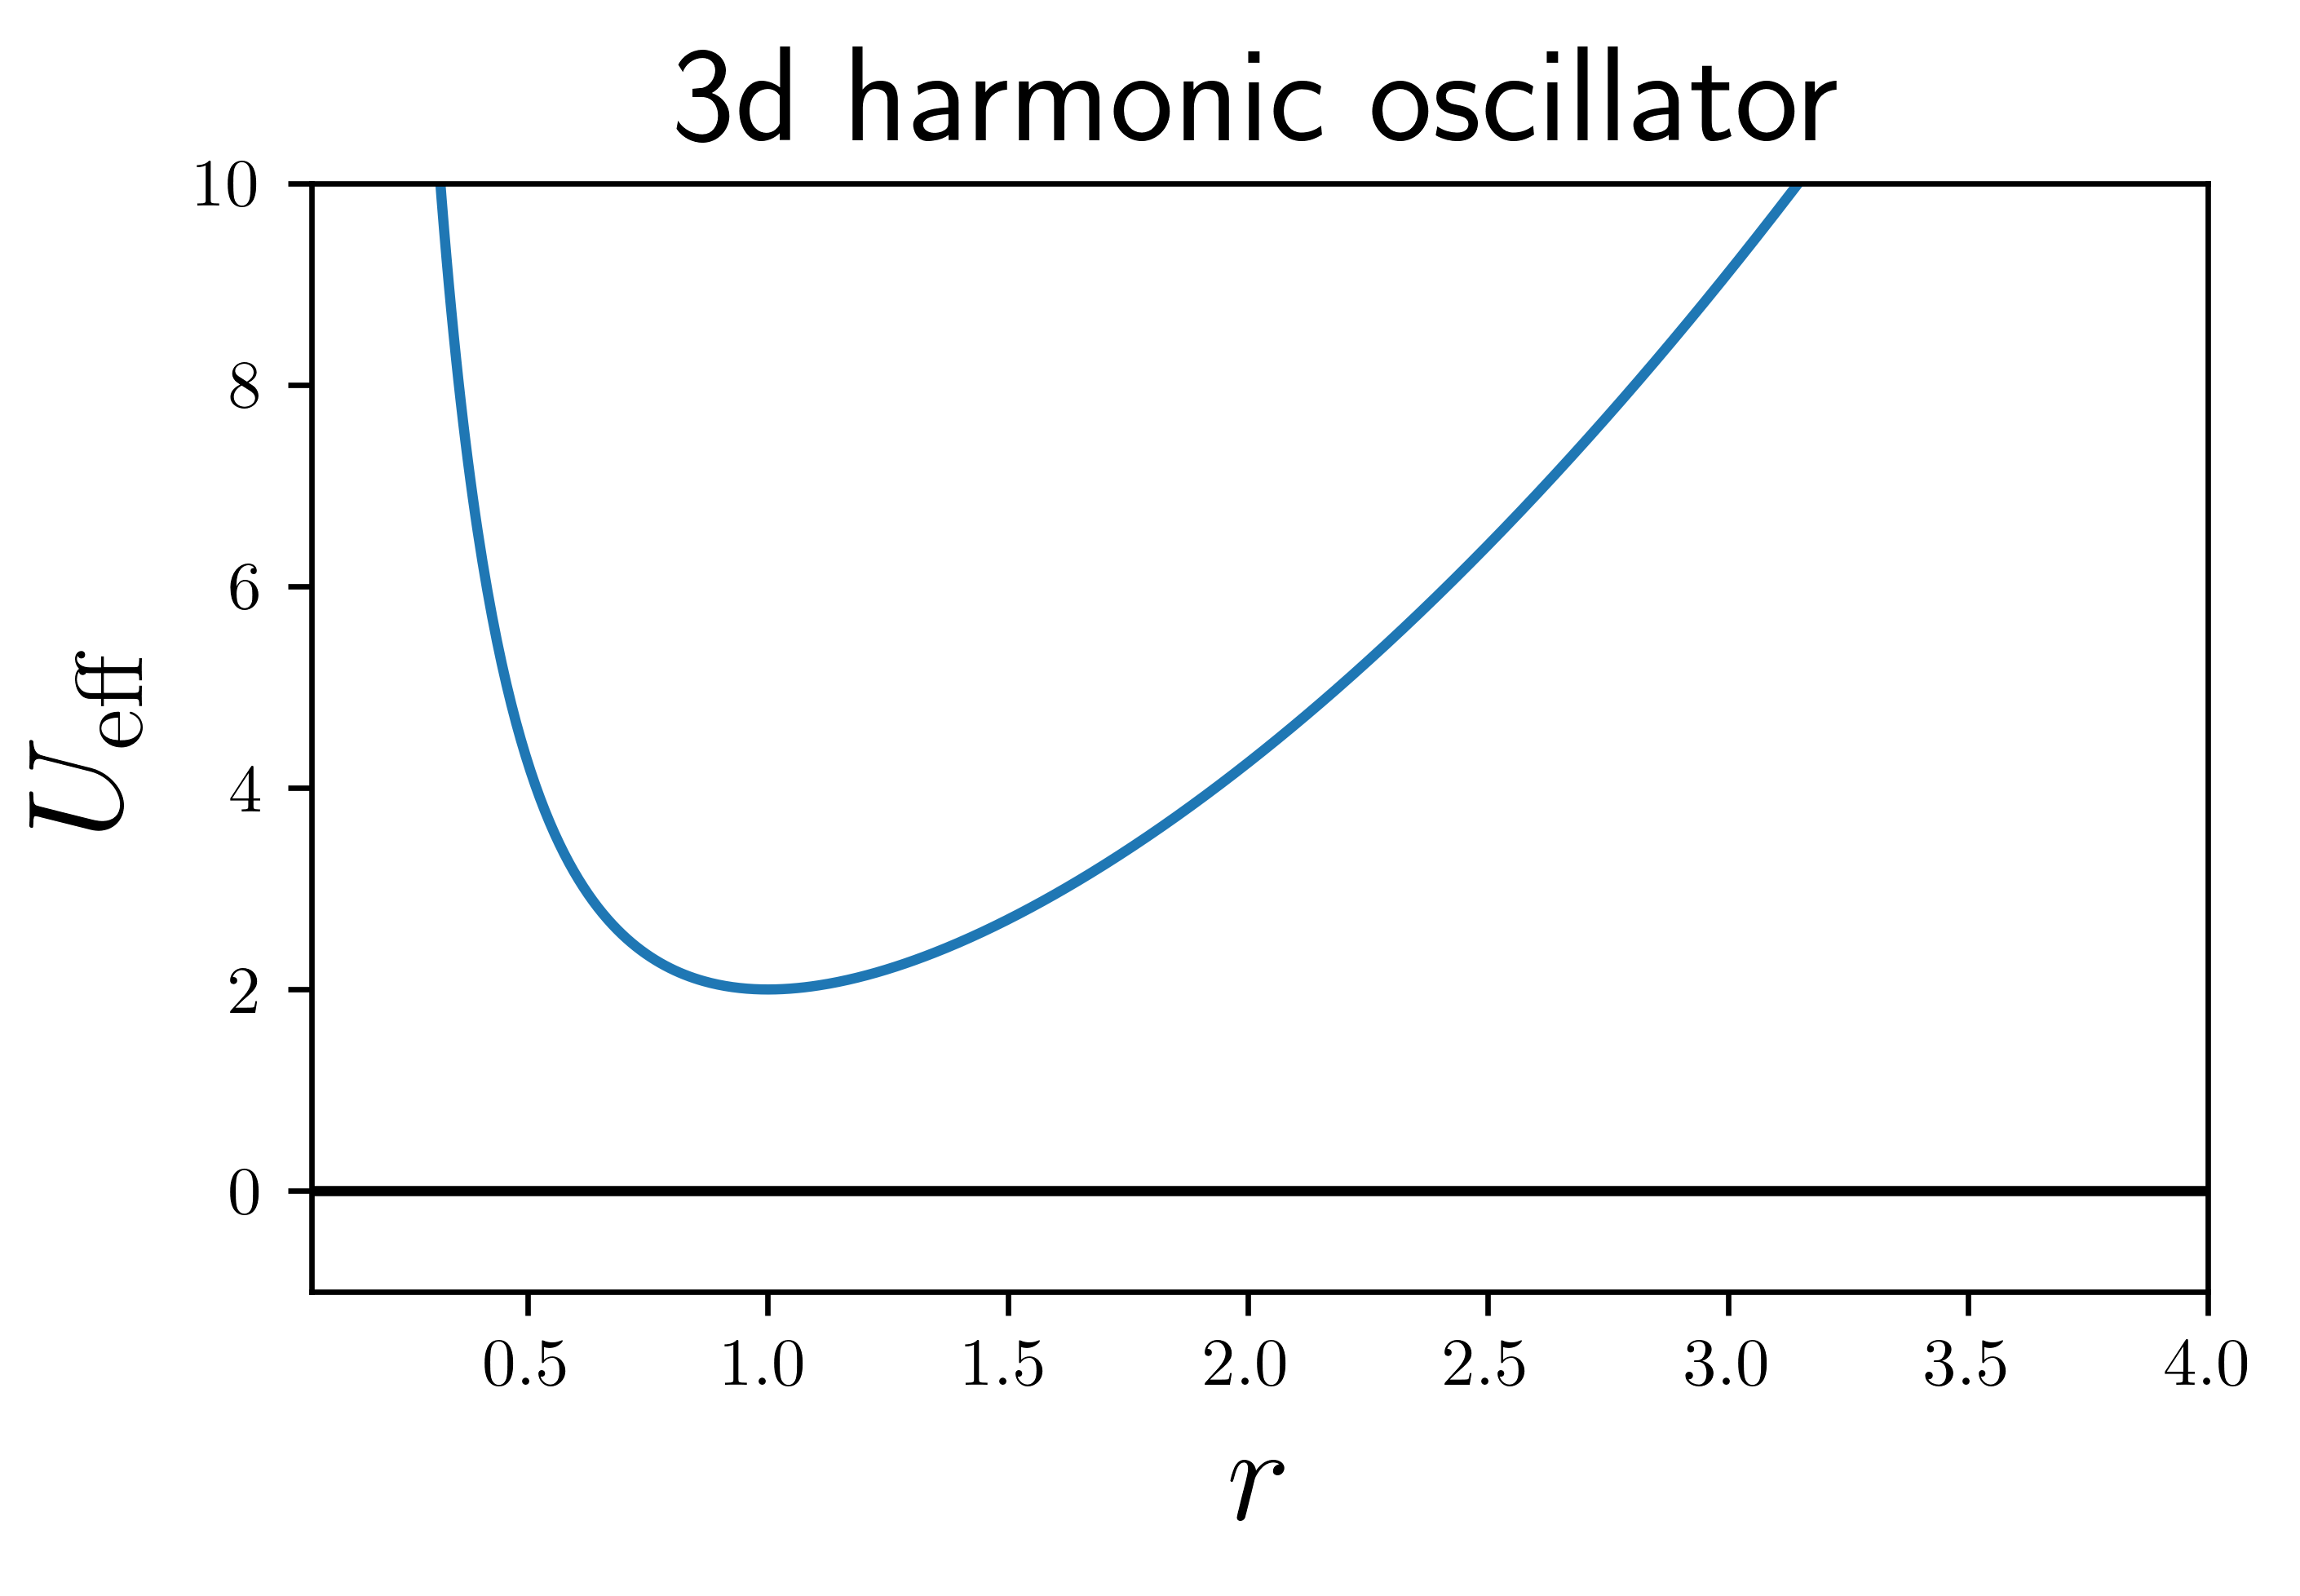

In [23]:
# 3d harmonic oscillator effective potential
eps = 1e-4
r = np.linspace(eps, 5, 1000)

U = r**2
Ueff = U + 1./r**2

plt.figure()
plt.plot(r, Ueff)
plt.axhline(y=0, color='k')
plt.xlim((0.05, 4))
plt.ylim((-1,10))
plt.xlabel('$r$', fontsize='20')
plt.ylabel('$U_{\mathrm{eff}}$', fontsize='20')
plt.title('3d harmonic oscillator', fontsize='20')

Text(0.5, 1.0, 'General relativity')

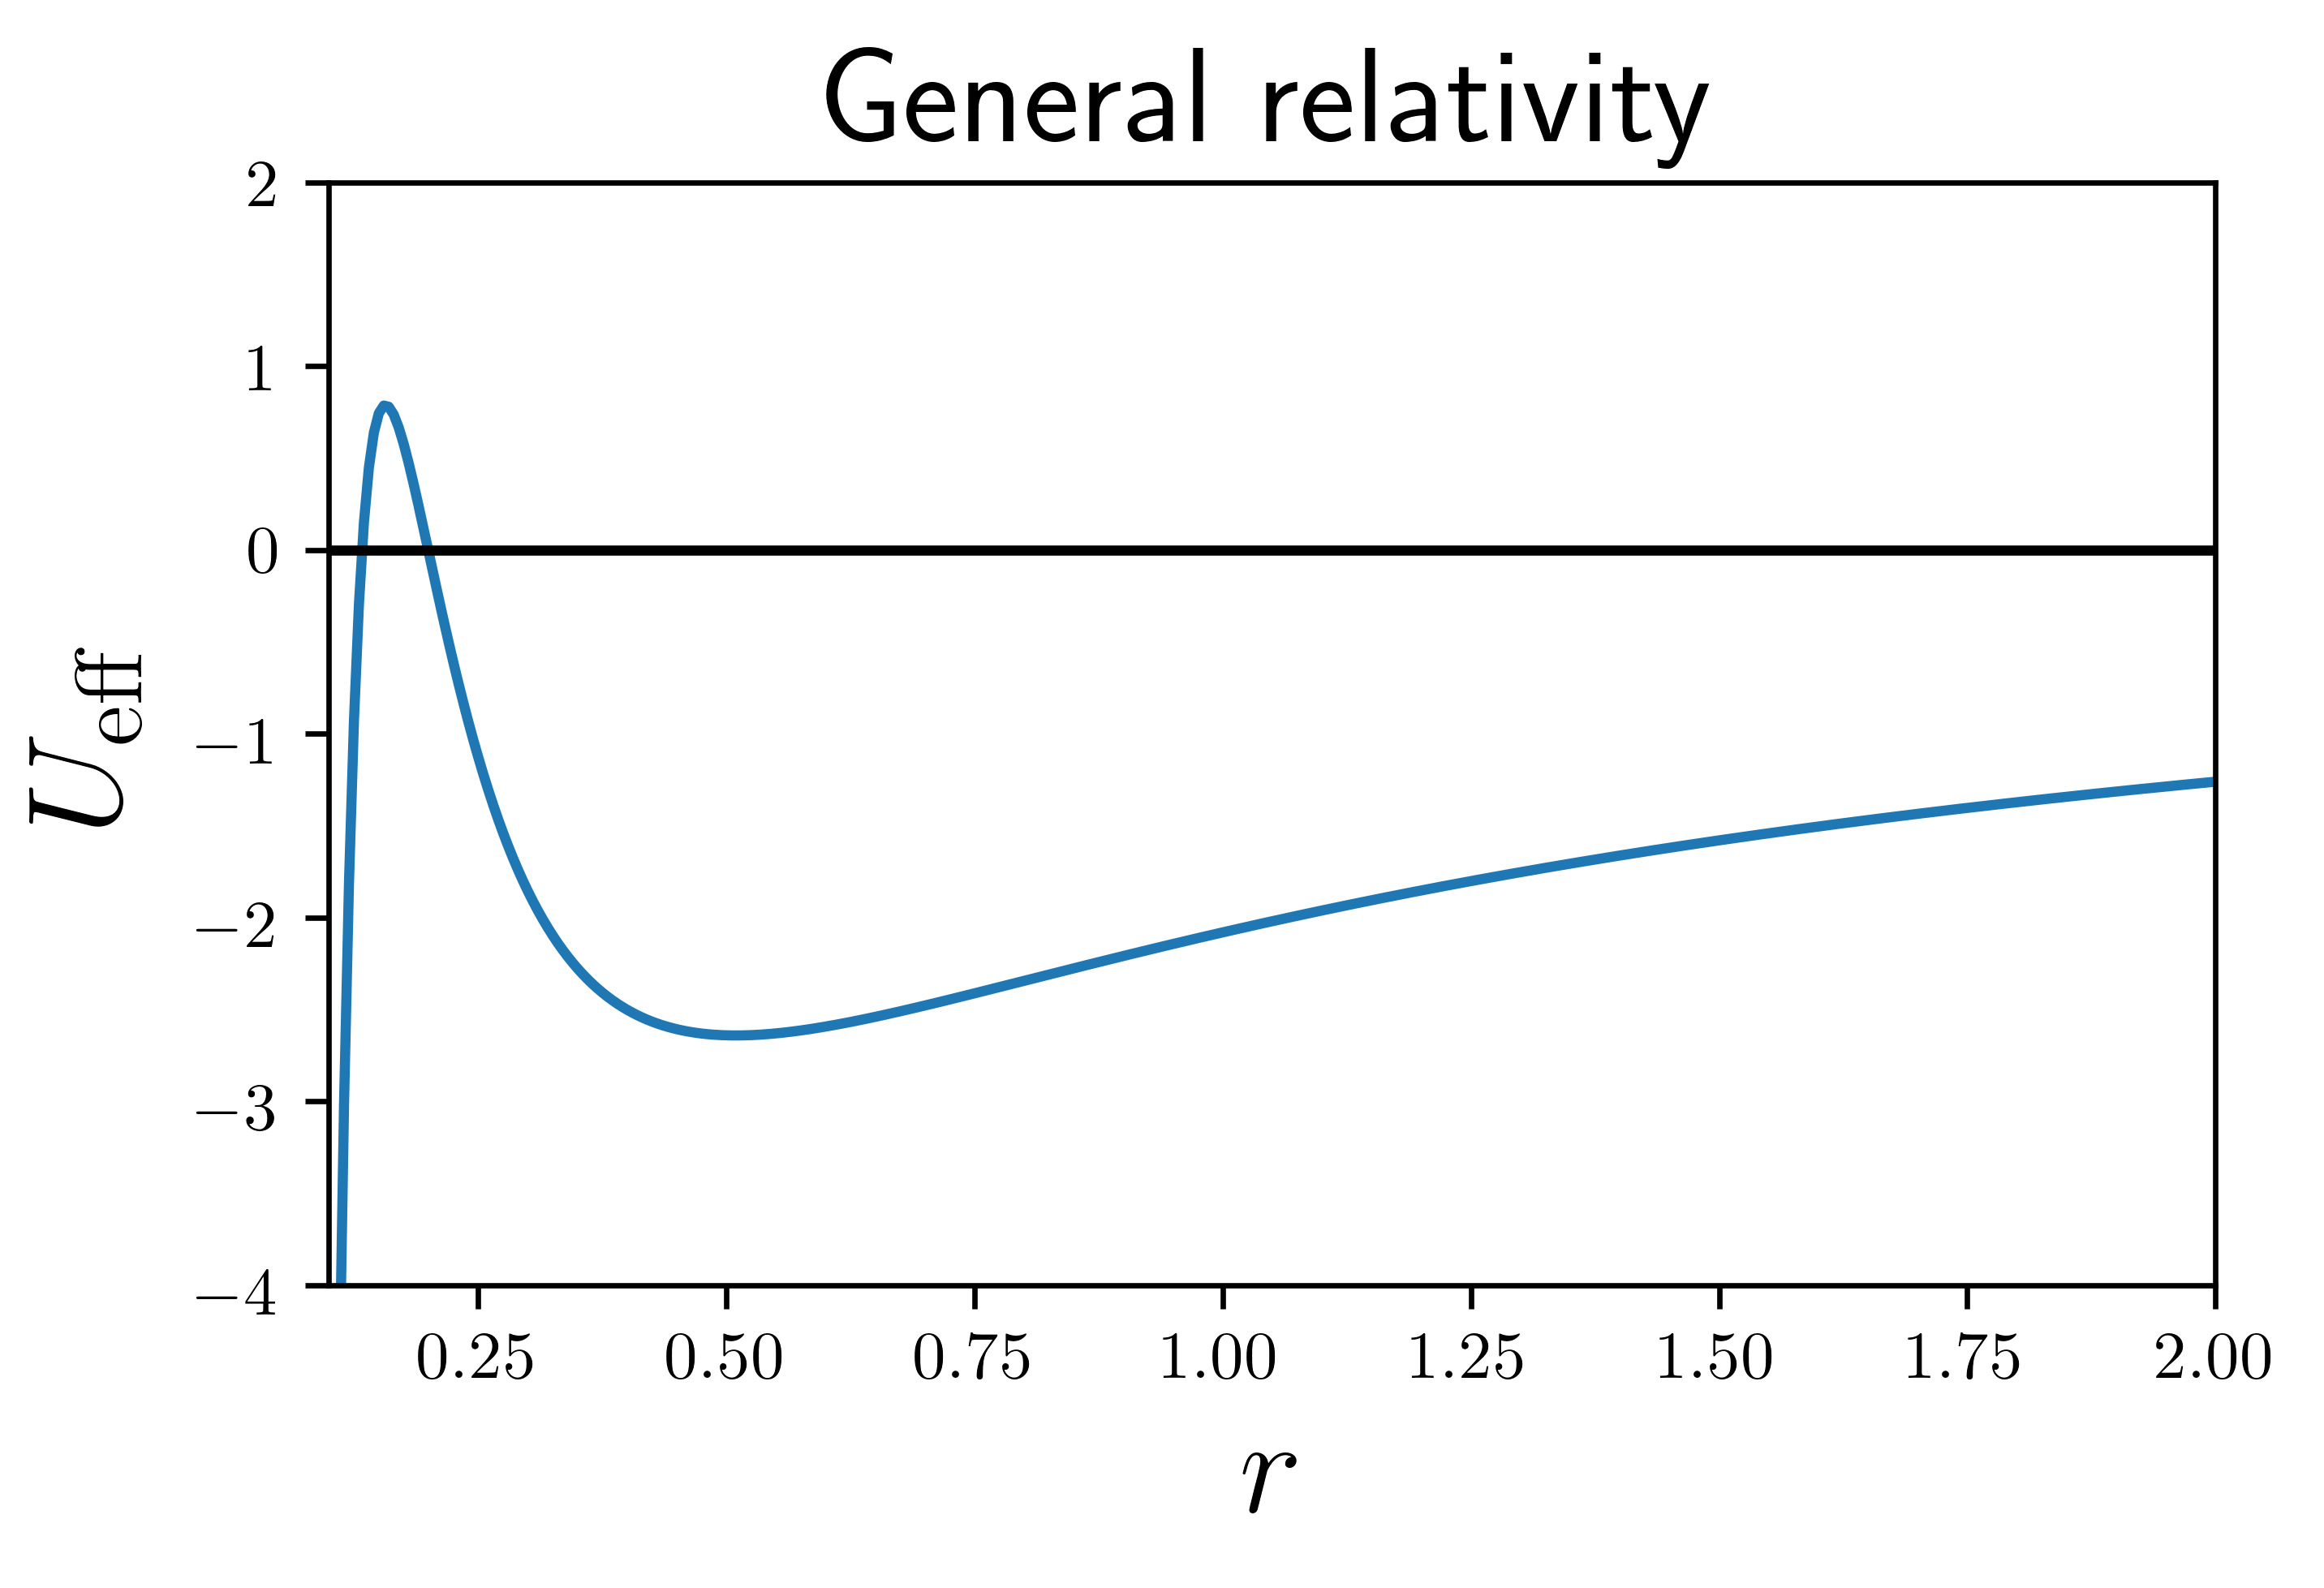

In [24]:
# GR effective potential
eps = 1e-4
r = np.linspace(eps, 5, 1000)

U1 = -3./r
U2 = -0.08/r**3
Ueff = U1 + U2 + 1./r**2

plt.figure()
plt.plot(r, Ueff)
plt.axhline(y=0, color='k')
plt.xlim((0.1, 2))
plt.ylim((-4,2))
plt.xlabel('$r$', fontsize='20')
plt.ylabel('$U_{\mathrm{eff}}$', fontsize='20')
plt.title('General relativity', fontsize='20')

In [3]:
# symbolic calculation (for future reference)
x = symbols('x')
a = Integral(cos(x)*exp(x), x)
Eq(a, a.doit())

Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2)

t0 = 1.4809609793861218
period = 8.885765876316732


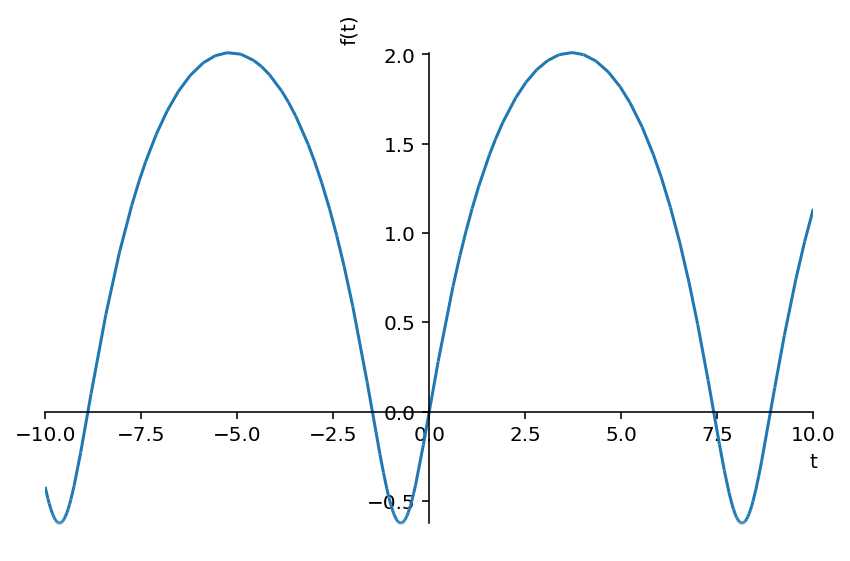

t0 = -0.7071067811865475
x0 = -0.6931471805599453


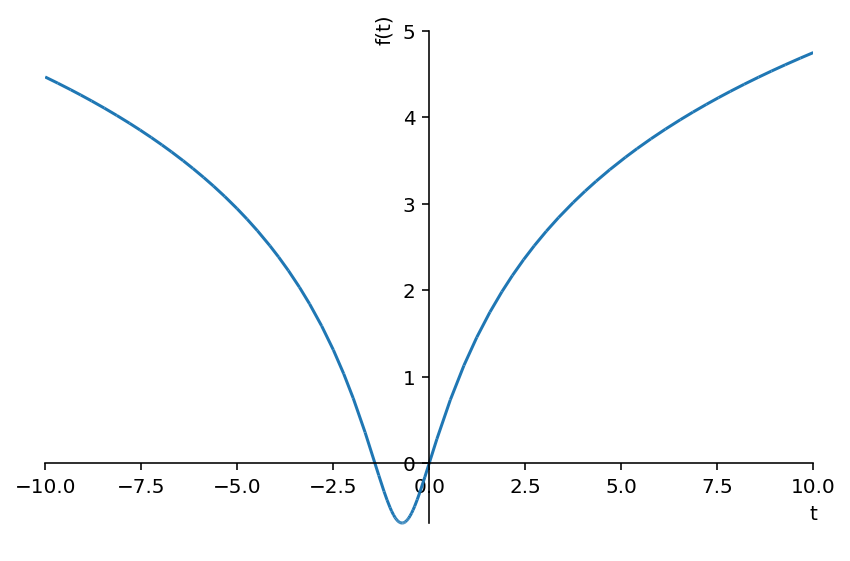

t0 = 0.5731079173902944


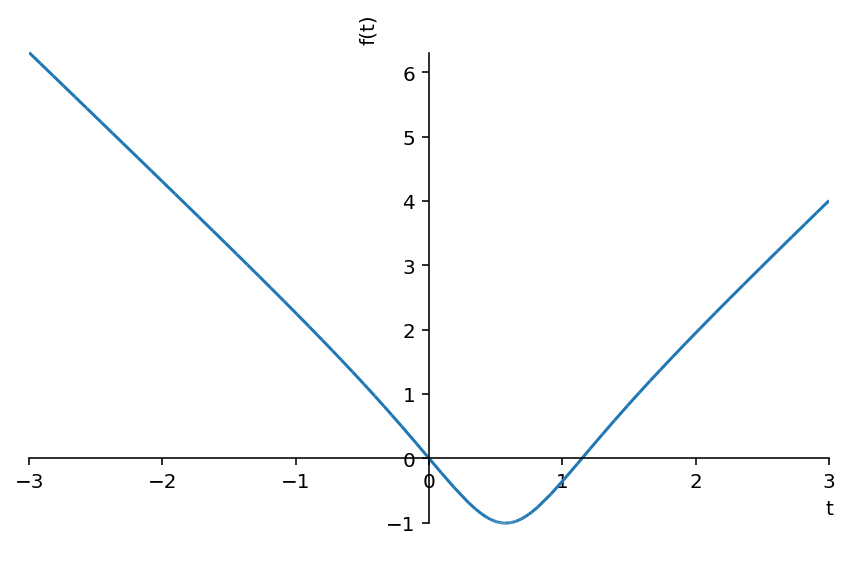

In [4]:
# problem 1a
x, t = symbols('x, t') 

# bound solution
E = -0.25
t0 = (1/np.sqrt(2*abs(E))) * np.arcsin(np.sqrt(1-abs(E)))
T = 2*np.pi/np.sqrt(2*abs(E))
print('t0 =', t0)
print('period =', T)

x = log( (1/abs(E)) * (1 + np.sqrt(1-abs(E)) * sin(np.sqrt(2*abs(E)) * (t-t0)) )  )
plot(x)

# critical solution
E = 0
t0 = -1/np.sqrt(2)
print('t0 =', t0)
x0 = -np.log(2)
print('x0 =', x0)
x = log( 1/2 + (t-t0)**2 )
plot(x)

# scattering solution
E = 2
t0 = (1/np.sqrt(2*E)) * np.arccosh(np.sqrt(1+E))
print('t0 =', t0)

x = log( (1/E) * (-1 + np.sqrt(1+E) * cosh(np.sqrt(2*E) * (t-t0)) )  )
plot(x, (t, -3, 3))

period = 8.885765876316732


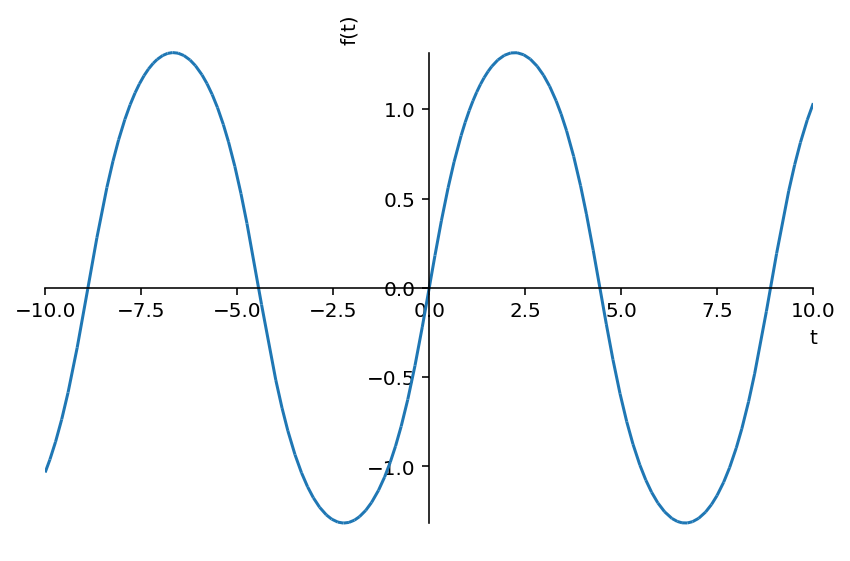

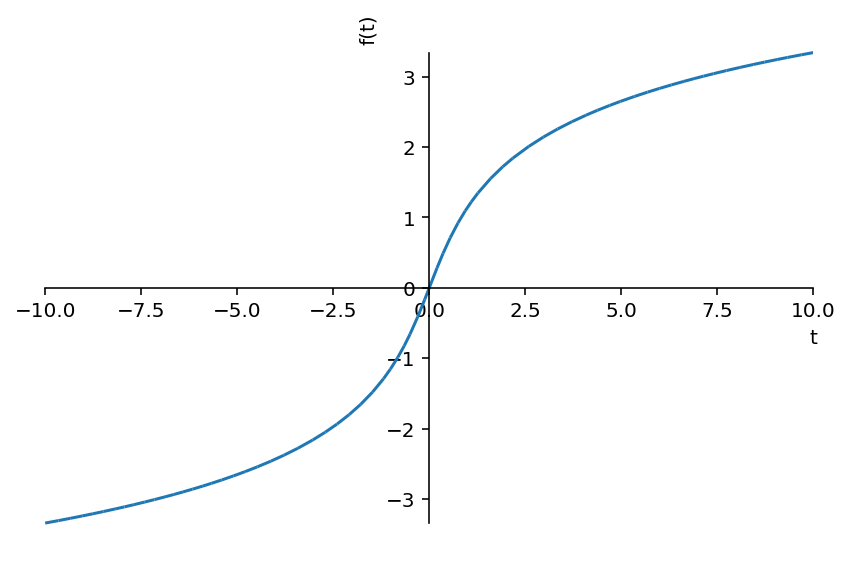

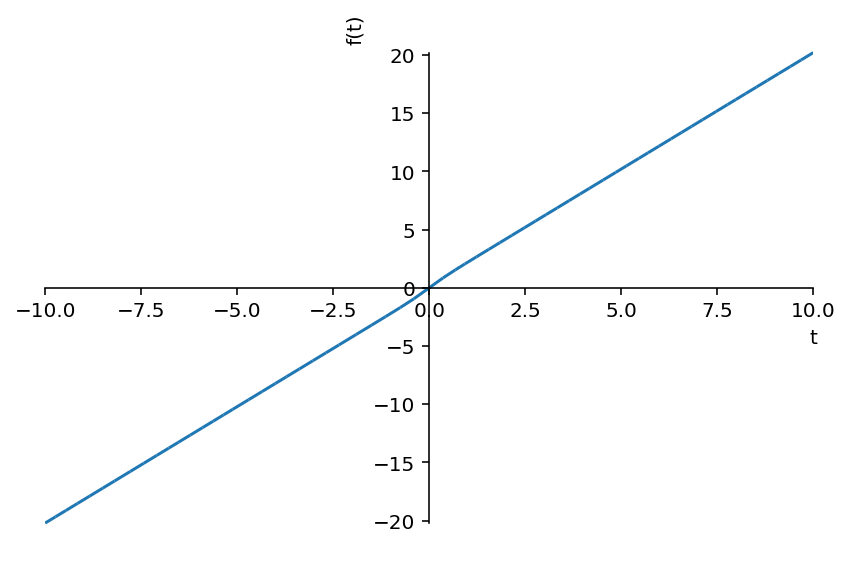

In [5]:
# problem 1.1(b)
x, t = symbols('x, t') 

# bound solution
E = -0.25
T = 2*np.pi/np.sqrt(2*abs(E))
print('period =', T)

x = asinh( np.sqrt(-1 + 1/abs(E)) * sin( np.sqrt(2*abs(E)) * t) )
plot(x)

# critical solution
E = 0
x = asinh( np.sqrt(2) * t )
plot(x)

# scattering solution
E = 2

x = asinh( np.sqrt(1 + 1/E) * sinh(np.sqrt(2*E) * t) )
plot(x)

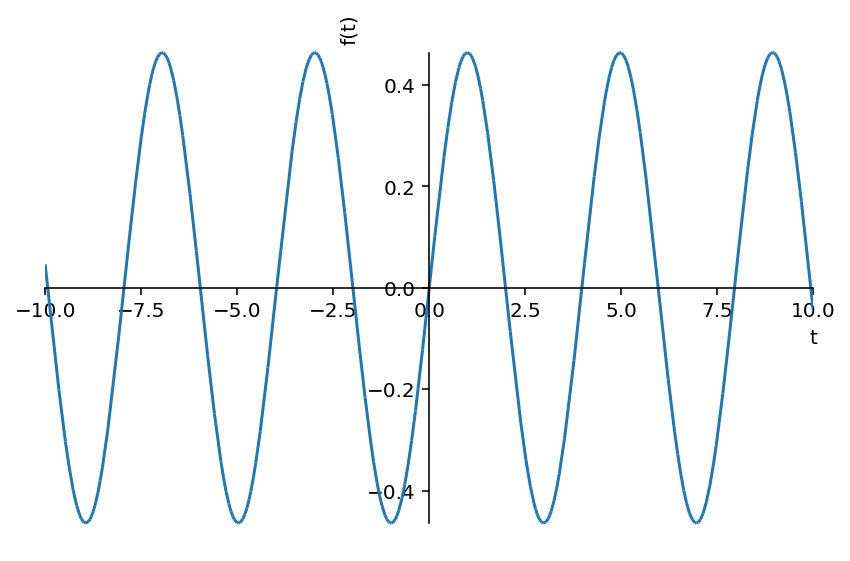

In [6]:
# problem 1.1(c)

# only bound solutions with E>0
x, t = symbols('x, t')
E = 0.25
U0 = 1

x = asin( np.sqrt(E/(E+U0)) * sin (np.sqrt(2*(E+U0)) * t) )
plot(x)